<a href="https://colab.research.google.com/github/ArtemPch/Laba/blob/main/untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача

20. Условная оптимизация. Метод штрафных функций
Рассмотрим один из многочисленных вариантов метода штрафных функций. Задача условной оптимизации
f(x)→min 
при ограничениях
g1(x)=0,…,gm(x)=0,h1(x)≤0,…,hp(x)≤0 
решается при помощи решения последовательности вспомогательных задач безусловной оптимизации:
(F(x)+c∑i=1mg(hi)2+c∑k=1p[h(hk)]2+)→min, 
где  c  – некоторая возрастающая последовательность (например, геометрическая прогрессия),  [α]+=max{0,α} .

Реализуйте данный метод. Для решения задачи безусловной оптимизации воспользуйтесь функциями из библиотеки SciPy.

Проиллюстрируйте работу метода на двумерной и многомерных функциях Розенброка
f(x1,x2,…,xn)=∑i=1n−1((1−xi)2+100(xi+1−x2i)2) 
с линейными и квадратичными ограничениями. Для  n=2  изобразите найденные точки минимума на каждой итерации.



# Решение
Сначала нужно импортировать необходимые библиотеки

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm, pylab
import numpy as np
from scipy.optimize import minimize, rosen

В четветой импортированной нами библиотеке уже существует функция **minimize()** для поиска минимального значения функции с ограничениями, которую мы можем использовать для проверки находимых нами значений.

Теперь перейдем к основному решению задачи.

## **Двумрерная функция Розенброка**

Для начала зададим двумерную функцию Розенброка с ее ограничениями и основные коэффициенты, которые потребуются нам в ходе решения.

$$
f(x, y) = (1 - x) ^ 2 + 100 (y - x ^ 2 ) ^ 2 
$$

$$
x > 0
$$

$$
y > 0
$$

In [8]:
x_s = [0.1, 0.1] # Начальная точка
i = 1            # Количество итераций цикла
r = 1            # Параметр, значения которого убывают с каждой итерации
b = 0.2          # Коэффициент, показывающий 
eps = 0.000001   # Точность значения, по достижении которой работа программы завершается

roz = lambda x: (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2 # Функция Розенброка от 2 переменных
func = lambda x: roz(x) + r * (h_1(x) ** 2 + h_2(x) ** 2)
h_1 = lambda x: (x[0] - 0)
h_2 = lambda x: (x[1] - 0)

Теперь реализуем метод штрафных функций и проверим его с помощью minimize().

Найденный минимум методом штрафных функций: [0.99998784 0.99997565]
Найденный минимум функцией minimize():      [0.99930098 0.99859174]
Итераций работы программы:                  11


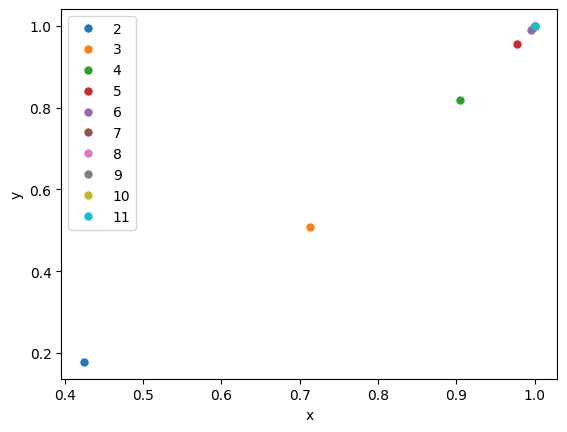

In [9]:
while i < 1000:
    if(i >= 2):
        plt.plot(x_s[0], x_s[1], 'o', markersize = 5, label = i)
    if r*(max(0, h_1(x_s)) ** 2 + max(0, h_2(x_s)) ** 2) < eps:
        break
    x_s = minimize(func, x_s).x
    i += 1
    r *= b  


# Проверка
x_check = [0.1, 0.1];
constr = ({'type': 'ineq', 'fun': h_1},
          {'type': 'ineq', 'fun': h_2},) 
min_res = minimize(roz, x_check, constraints=constr)


print("Найденный минимум методом штрафных функций: " + str(x_s))
print("Найденный минимум функцией minimize():      " + str(min_res.x))
print("Итераций работы программы:                  " + str(i))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
pass

Теперь зададим новые ограничения и посмотрим результаты.

$$
x ^ 2 > 2
$$

$$
y ^ 2  > 13
$$

Найденный минимум методом штрафных функций: [1.73193984 2.9996156 ]
Найденный минимум функцией minimize():      [1.73205081 2.99999973]
Итераций работы программы:                  15


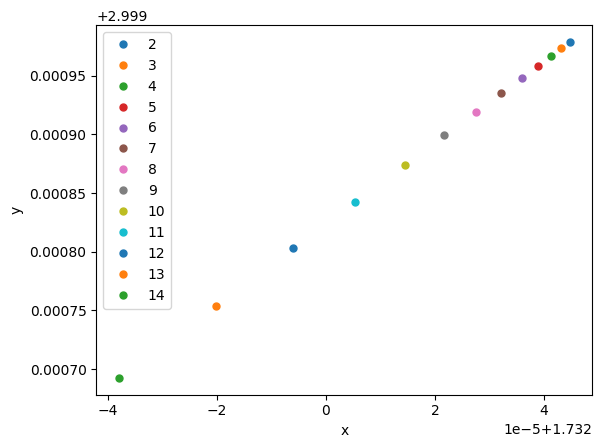

In [10]:
x_s = [5, 5]
i = 1
r = 0.1
b = 0.8
eps = 0.0001

roz = lambda x: (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2
func = lambda x: roz(x) + r*(max(0, h_1(x))**2 + max(0, h_2(x))**2)
h_1 = lambda x: (x[0]**2 + x[1]**2 - 4)
h_2 = lambda x: (x[0]**2 - 3)



while i < 15:
    if(i >= 2):
        plt.plot(x_s[0], x_s[1], 'o', markersize = 5, label = i)
    if r*(max(0, h_1(x_s))**2 + max(0, h_2(x_s))**2) < eps:
        break
    func = lambda x: roz(x) + r*(min(0, h_1(x))**2 + min(0, h_2(x))**2)*100000
    x_s = minimize(func, x_s).x;
    i += 1
    r  *= b;

# Проверка
x_check = [1, 3];
constr = ({'type': 'ineq', 'fun': h_1},
          {'type': 'ineq', 'fun': h_2},) 
min_res = minimize(roz, x_check, constraints=constr)


print("Найденный минимум методом штрафных функций: " + str(x_s))
print("Найденный минимум функцией minimize():      " + str(min_res.x))
print("Итераций работы программы:                  " + str(i))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
pass

## **Трехмерная функция Розенброка**

$$
f(x, y) = (1 - x) ^ 2 + 100 (y - x ^ 2 ) ^ 2 + (1 - y) ^ 2 + 100 (z - y ^ 2 ) ^ 2 
$$

$$
x ^ 2 > 70
$$

$$
y ^ 2 + z ^ 2 > 154
$$

$$
z > 50
$$

Найденный минимум методом штрафных функций: [ 2.6585      7.07074871 50.00000025]
Найденный минимум функцией minimize():      [ 2.6584995   7.07074746 50.        ]
Итераций работы программы:                  10


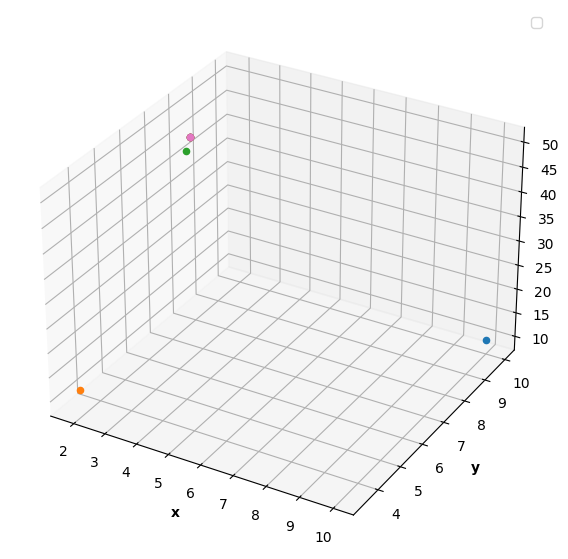

In [11]:
x_s = [10, 10, 10]
i = 1
eps = 0.000001
r = 0.001
b = 200


h_1 = lambda x: (x[0]**2 + 70)
h_2 = lambda x: (x[0]**2 + x[2]**2 - 154)
h_3 = lambda x: (x[2] - 50)

roz = lambda x: (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[1]) ** 2 + 100 * (x[2] - x[1] ** 2) ** 2
func = lambda x: roz(x) + r * (h_1(x) ** 2 + h_2(x) ** 2 + h_3(x) ** 2)
     
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

while i < 10:
    if(i >= 1):
        ax.scatter3D(x_s[0], x_s[1], x_s[2])
    if r*(max(0, h_1(x_s)) ** 2 + max(0, h_2(x_s)) ** 2 + max(0, h_3(x_s)) ** 2) < eps:
        break
    func = lambda x: roz(x) + r * (min(0, h_1(x)) ** 2 + min(0, h_2(x)) ** 2 + min(0, h_3(x)) ** 2)
    x_s = minimize(func, x_s).x;
    i += 1
    r  *= b;   


x_check = [10, 10, 10];
constr = ({'type': 'ineq', 'fun': h_1},
          {'type': 'ineq', 'fun': h_2},
          {'type': 'ineq', 'fun': h_3}) 
min_res = minimize(roz, x_check, constraints=constr)


print("Найденный минимум методом штрафных функций: " + str(x_s))
print("Найденный минимум функцией minimize():      " + str(min_res.x))
print("Итераций работы программы:                  " + str(i))

ax.set_xlabel('x', fontweight ='bold')
ax.set_ylabel('y', fontweight ='bold')
ax.set_zlabel('z', fontweight ='bold')
ax.legend()

pass

# **Вывод**

Метод штрафных функций используется в решения задач оптимизации для нахождения минимального значения функции. Он заключается в "наложении штрафа" на функцию в случае выхождения за границы.

В ходе решения лабораторной работы мне удалось реализовать этот метод, проверить его работу на двумерной и трехменой функциях Розенброта, построить графики хода решения и сравнить полученные результаты со встроенной функцией нахождения минимального значения функции с ограничениями.

По итогам результатов можно сказать, что эффективность решения с помощью метода штрафных функций сравнима с использованием функции minimaze(), хоть у первого и есть некоторые погрешности и тонкости в настройке.